In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.set_option("display.max_column", None)

In [2]:
df = pd.read_csv("./student_score.csv")

In [3]:
df.head(5)

,Unnamed: 0,gender,StudentId,math score,reading score,writing score,intelligent_level
0,0,female,ATR/1111,72,72,74,3
1,1,female,ATR/1112,69,90,88,4
2,2,female,ATR/1113,90,95,93,1
3,3,male,ATR/1114,47,57,44,9
4,4,male,ATR/1115,76,78,75,3


In [4]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head(5)

,gender,StudentId,math score,reading score,writing score,intelligent_level
0,female,ATR/1111,72,72,74,3
1,female,ATR/1112,69,90,88,4
2,female,ATR/1113,90,95,93,1
3,male,ATR/1114,47,57,44,9
4,male,ATR/1115,76,78,75,3


In [6]:
df.isna().sum()

gender               0
StudentId            0
math score           0
reading score        0
writing score        0
intelligent_level    0
dtype: int64

In [7]:
df = pd.DataFrame(df, columns=["StudentId","gender","intelligent_level","math score","reading score","writing score"])

In [8]:
df.head(5)

,StudentId,gender,intelligent_level,math score,reading score,writing score
0,ATR/1111,female,3,72,72,74
1,ATR/1112,female,4,69,90,88
2,ATR/1113,female,1,90,95,93
3,ATR/1114,male,9,47,57,44
4,ATR/1115,male,3,76,78,75


In [9]:
df.shape

(1000, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   StudentId          1000 non-null   object
 1   gender             1000 non-null   object
 2   intelligent_level  1000 non-null   int64 
 3   math score         1000 non-null   int64 
 4   reading score      1000 non-null   int64 
 5   writing score      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
intelligent_level,1000.0,4.911,2.619913,0.0,3.00,5.0,7.0,10.0
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [12]:
df = pd.get_dummies(df, columns=["gender"])

In [13]:
df.head(5)

,StudentId,intelligent_level,math score,reading score,writing score,gender_female,gender_male
0,ATR/1111,3,72,72,74,1,0
1,ATR/1112,4,69,90,88,1,0
2,ATR/1113,1,90,95,93,1,0
3,ATR/1114,9,47,57,44,0,1
4,ATR/1115,3,76,78,75,0,1


In [14]:
df.rename(columns={"gender_male":"male","gender_female":"female"}, inplace =True)

In [15]:
df = pd.DataFrame(df, columns=["StudentId","intelligent_level","female","male","math score","reading score","writing score"])

In [16]:
df.head(5)

,StudentId,intelligent_level,female,male,math score,reading score,writing score
0,ATR/1111,3,1,0,72,72,74
1,ATR/1112,4,1,0,69,90,88
2,ATR/1113,1,1,0,90,95,93
3,ATR/1114,9,0,1,47,57,44
4,ATR/1115,3,0,1,76,78,75


In [17]:
df.corr()

,intelligent_level,female,male,math score,reading score,writing score
intelligent_level,1.000000,-0.067941,0.067941,-0.730281,-0.725773,-0.725198
female,-0.067941,1.000000,-1.000000,-0.167982,0.244313,0.301225
male,0.067941,-1.000000,1.000000,0.167982,-0.244313,-0.301225
math score,-0.730281,-0.167982,0.167982,1.000000,0.817580,0.802642
reading score,-0.725773,0.244313,-0.244313,0.817580,1.000000,0.954598
writing score,-0.725198,0.301225,-0.301225,0.802642,0.954598,1.000000


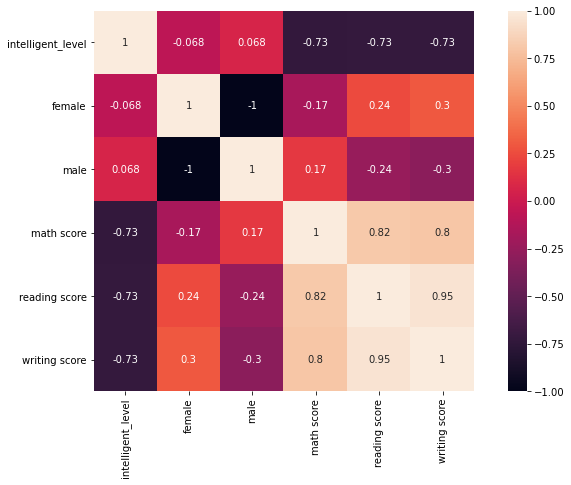

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True)
plt.show()

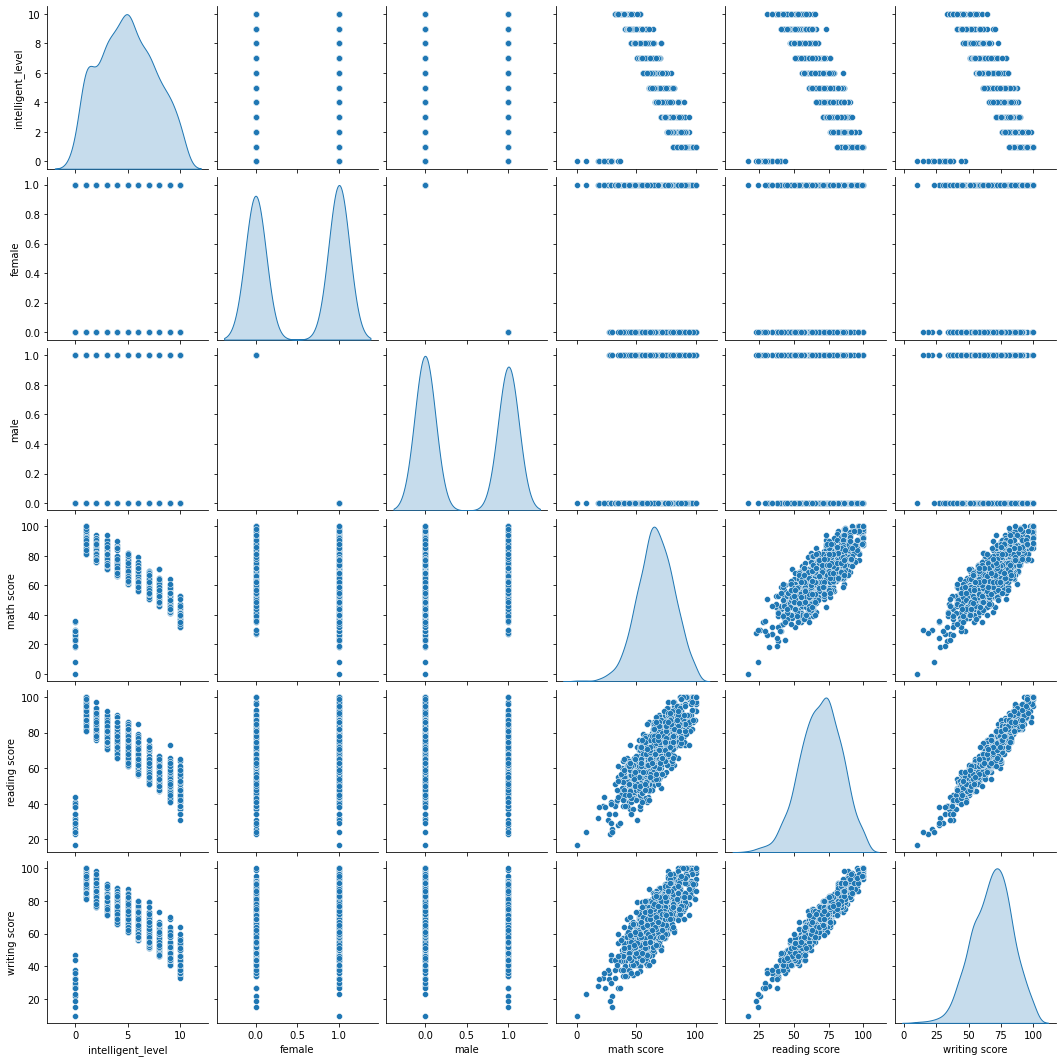

In [19]:
sns.pairplot(df, diag_kind='kde')

In [20]:
df.drop(columns = ["StudentId","female","male"],axis=1, inplace=True)

In [21]:
df.head(5)

,intelligent_level,math score,reading score,writing score
0,3,72,72,74
1,4,69,90,88
2,1,90,95,93
3,9,47,57,44
4,3,76,78,75


In [22]:
df.max()

intelligent_level     10
math score           100
reading score        100
writing score        100
dtype: int64

In [23]:
df.min()

intelligent_level     0
math score            0
reading score        17
writing score        10
dtype: int64

In [24]:
df[df["intelligent_level"] == 0].head(4)

,intelligent_level,math score,reading score,writing score
17,0,18,32,28
59,0,0,17,10
76,0,30,26,22
91,0,27,34,36


In [25]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [26]:
x_train, x_test, y_train, y_test = tts(x,y, train_size=.7, random_state=10)

In [27]:
print("the % of train data is: ", (len(x_train)/len(df))*100,"%")
print("the % of test data is: ", (len(x_test)/len(df))*100,"%")


the % of train data is:  70.0 %
the % of test data is:  30.0 %


In [28]:
model = LR()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
model.score(x_train, y_train)

0.5169906772688252

In [31]:
model.coef_

array([-0.06517501, -0.0205102 , -0.04532191])

In [32]:
for i, w in enumerate(x_train):
    print("Coefficient of {} is {}".format(w, round(model.coef_[i],4)))

Coefficient of math score is -0.0652
Coefficient of reading score is -0.0205
Coefficient of writing score is -0.0453


In [33]:
print("The intercept of the linear regression is {}".format(round(model.intercept_,2)))

The intercept of the linear regression is 13.67


In [34]:
x_test.head()

#x_test = x_test.drop(columns=["reading score", "writing score"],axis=1)

,math score,reading score,writing score
841,64,58,51
956,84,87,81
544,64,63,66
173,63,67,70
759,69,77,77


In [35]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
def error(test,pred):
    MAE = mae(test,pred)  
    MSE = mse(y_test,pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(test, pred)
    print("the mean absolute error is:",round(MAE, 3))
    print("the mean squared error is:",round(MSE, 3))
    print("the Root mean squared error is:",round(RMSE, 3))
    print("the R-squared value is:",round(R2, 3))
error(y_test, y_pred)

the mean absolute error is: 0.857
the mean squared error is: 1.545
the Root mean squared error is: 1.243
the R-squared value is: 0.761


In [51]:
x_train.iloc[:,0]

742    81
676    73
571    91
99     65
78     61
       ..
320    67
527    36
996    62
125    87
265    59
Name: math score, Length: 700, dtype: int64

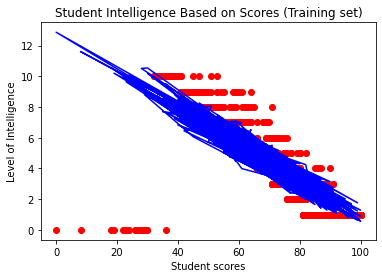

In [50]:
#visualizing results for train data
plt.scatter(x_train.iloc[:,0], y_train, color='red')
plt.plot(x_train.iloc[:,0], model.predict(x_train), color='blue')
plt.title("Student Intelligence Based on Scores (Training set)")
plt.xlabel("Student scores")
plt.ylabel("Level of Intelligence")
plt.show()